In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

In [43]:
X_train = pd.read_csv('../data/train/X_train.csv')
X_test = pd.read_csv('../data/test/X_test.csv')
y_train = pd.read_csv('../data/train/y_train.csv').values.ravel()  # `.values.ravel()` flattens the target array if it's a DataFrame
y_test = pd.read_csv('../data/test/y_test.csv').values.ravel() 

Following the paper:
1. First, we train nine different popular machine learning models and
analyze their performance.
2. Secondly, we form two ensemble models: one consists of the nine
classifiers, and another consists of the top three performing models.
The performance of these ensemble approaches is evaluated.
3. Thirdly, the model with the highest accuracy is selected to include
in a Desktop based application.
4. Finally, a user application is developed, and the best-performing
machine learning model is adopted to forecast loan defaulters.

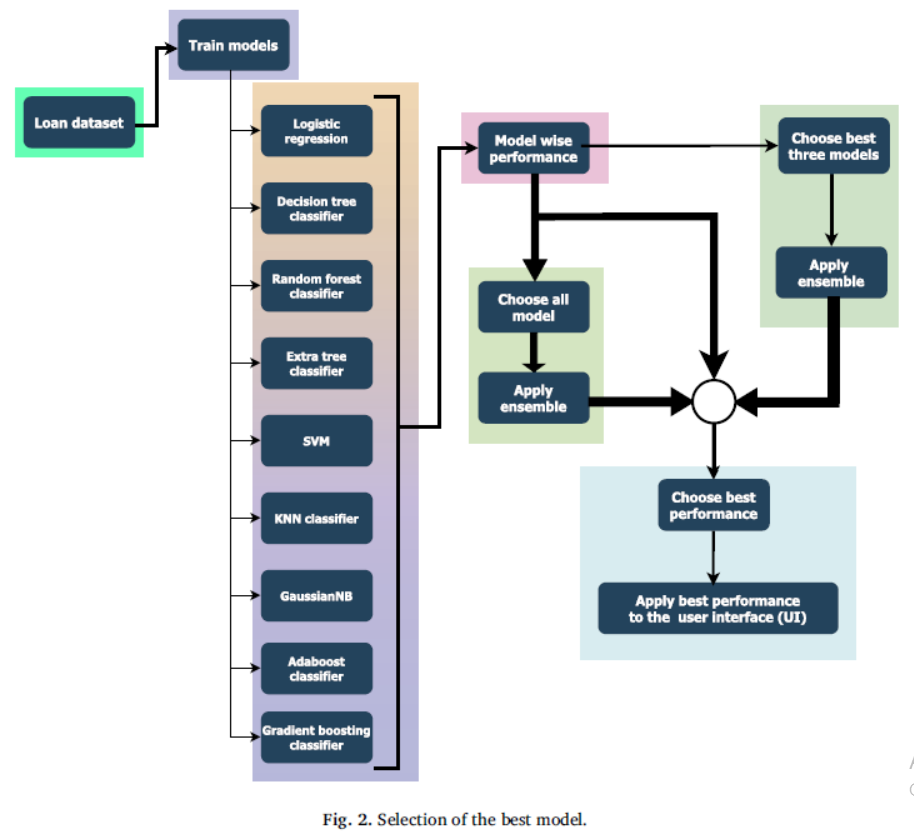

In [44]:
# Set the experiment name
mlflow.set_experiment("Model Comparison and Hyperparameter Tuning")

# Enable autologging
mlflow.sklearn.autolog()

In [46]:
param_grids = {
    "LR": {"C": [0.1, 1, 10], "penalty": ["l2"]},
    "DT": {"max_depth": [5, 10, None], "criterion": ["gini", "entropy"]},
    "RF": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]},
    "ET": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {"n_neighbors": [3, 5, 7]},
    "AdB": {"n_estimators": [50, 100]},
    "GBC": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2]},
}

In [47]:
metrics = {}

for name, model in models.items():
    print(f"Training and tuning {name}...")
    
    # Perform Grid Search
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy")
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = model
        best_params = None
        best_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate model
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Log metrics with MLflow
    with mlflow.start_run(run_name=name):
        mlflow.log_param("Best_Params", best_params)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Precision_Yes", report['1']['precision'])
        mlflow.log_metric("Recall_Yes", report['1']['recall'])
        mlflow.log_metric("F1-Score_Yes", report['1']['f1-score'])
        mlflow.log_metric("Precision_No", report['0']['precision'])
        mlflow.log_metric("Recall_No", report['0']['recall'])
        mlflow.log_metric("F1-Score_No", report['0']['f1-score'])
    
    # Store metrics for visualization
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision_Yes': report['1']['precision'],
        'Recall_Yes': report['1']['recall'],
        'F1-Score_Yes': report['1']['f1-score'],
        'Precision_No': report['0']['precision'],
        'Recall_No': report['0']['recall'],
        'F1-Score_No': report['0']['f1-score'],
    }

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T

metrics_df.to_csv('../logs/metrics.csv', index=False)
print(metrics_df)

2025/01/26 12:51:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fbf339b9c3c942e18976a0abf34f36d3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/26 12:51:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers

Training and tuning LR...


d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Training and tuning DT...


2025/01/26 12:51:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:52:05 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2025/01/26 12:52:05 INFO mlflow.uti

Training and tuning RF...


2025/01/26 12:52:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:52:19 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2025/01/26 12:52:20 INFO mlflow.util

Training and tuning ET...


2025/01/26 12:52:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:52:32 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2025/01/26 12:52:33 INFO mlflow.util

Training and tuning SVM...


2025/01/26 12:52:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:52:41 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2025/01/26 12:52:41 INFO mlflow.uti

Training and tuning KNN...


2025/01/26 12:52:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:52:49 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2025/01/26 12:52:49 INFO mlflow.uti

Training and tuning GNB...


2025/01/26 12:52:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:52:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-R

Training and tuning AdB...


2025/01/26 12:52:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:53:03 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2025/01/26 12:53:03 INFO mlflow.uti

Training and tuning GBC...


2025/01/26 12:53:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:53:14 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.


     Accuracy  Precision_Yes  Recall_Yes  F1-Score_Yes  Precision_No  \
LR   0.683333       0.750000    0.769231      0.759494      0.550000   
DT   0.691667       0.766234    0.756410      0.761290      0.558140   
RF   0.758333       0.757895    0.923077      0.832370      0.760000   
ET   0.741667       0.752688    0.897436      0.818713      0.703704   
SVM  0.708333       0.759036    0.807692      0.782609      0.594595   
KNN  0.658333       0.712644    0.794872      0.751515      0.515152   
GNB  0.708333       0.772152    0.782051      0.777070      0.585366   
AdB  0.741667       0.764045    0.871795      0.814371      0.677419   
GBC  0.725000       0.771084    0.820513      0.795031      0.621622   

     Recall_No  F1-Score_No  
LR    0.523810     0.536585  
DT    0.571429     0.564706  
RF    0.452381     0.567164  
ET    0.452381     0.550725  
SVM   0.523810     0.556962  
KNN   0.404762     0.453333  
GNB   0.571429     0.578313  
AdB   0.500000     0.575342  
GBC   0.5

In [48]:
import os
import joblib

# Save all trained models
for name, model in models.items():
    filepath = f"D:/Loan-Approval-Prediction-Reimplementation/models/{name}.joblib"
    
    joblib.dump(model, filepath)
    print(f"Saved {name} model to {filepath}")


Saved LR model to D:/Loan-Approval-Prediction-Reimplementation/models/LR.joblib
Saved DT model to D:/Loan-Approval-Prediction-Reimplementation/models/DT.joblib
Saved RF model to D:/Loan-Approval-Prediction-Reimplementation/models/RF.joblib
Saved ET model to D:/Loan-Approval-Prediction-Reimplementation/models/ET.joblib
Saved SVM model to D:/Loan-Approval-Prediction-Reimplementation/models/SVM.joblib
Saved KNN model to D:/Loan-Approval-Prediction-Reimplementation/models/KNN.joblib
Saved GNB model to D:/Loan-Approval-Prediction-Reimplementation/models/GNB.joblib
Saved AdB model to D:/Loan-Approval-Prediction-Reimplementation/models/AdB.joblib
Saved GBC model to D:/Loan-Approval-Prediction-Reimplementation/models/GBC.joblib


In [49]:
# Sort metrics by Accuracy and get the top 3
top_3_models = metrics_df.sort_values(by="Accuracy", ascending=False).head(3)
print("Top 3 models based on accuracy:")
print(top_3_models)

# Save top 3 models
for name in top_3_models.index:
    filepath = f"D:/Loan-Approval-Prediction-Reimplementation/top_3_models/{name}.joblib"
    best_model = joblib.load(f"D:/Loan-Approval-Prediction-Reimplementation/models/{name}.joblib")  # Load the saved model
    joblib.dump(best_model, filepath)  # Save it with a "top_" prefix
    print(f"Saved top model {name} to {filepath}")


Top 3 models based on accuracy:
     Accuracy  Precision_Yes  Recall_Yes  F1-Score_Yes  Precision_No  \
RF   0.758333       0.757895    0.923077      0.832370      0.760000   
AdB  0.741667       0.764045    0.871795      0.814371      0.677419   
ET   0.741667       0.752688    0.897436      0.818713      0.703704   

     Recall_No  F1-Score_No  
RF    0.452381     0.567164  
AdB   0.500000     0.575342  
ET    0.452381     0.550725  
Saved top model RF to D:/Loan-Approval-Prediction-Reimplementation/top_3_models/RF.joblib
Saved top model AdB to D:/Loan-Approval-Prediction-Reimplementation/top_3_models/AdB.joblib
Saved top model ET to D:/Loan-Approval-Prediction-Reimplementation/top_3_models/ET.joblib


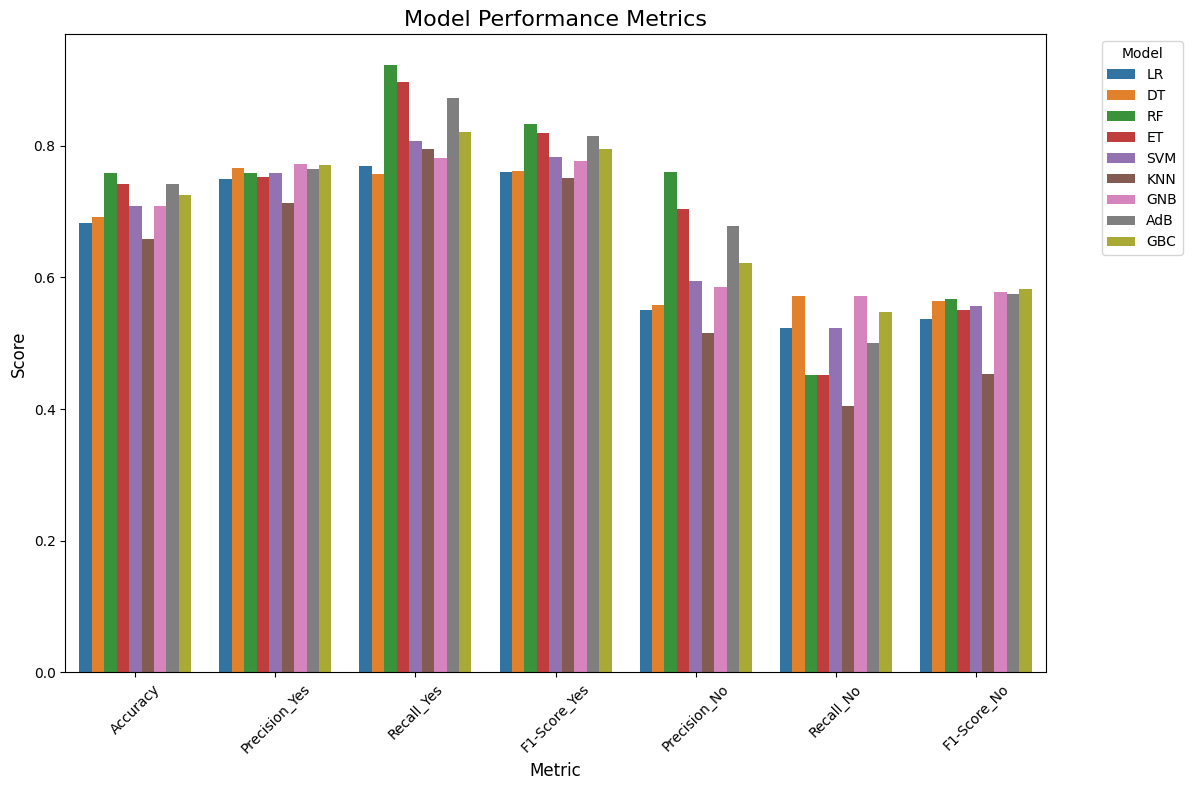

In [50]:
# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics).T  # Transpose to get models as rows

# Reset the index to convert the model names into a column
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to make it long-form (tidy)
tidy_metrics_df = metrics_df.melt(id_vars='Model', 
                                  var_name='Metric', 
                                  value_name='Score')

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=tidy_metrics_df, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Voting ensemble across all models

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
# Load models from paths
trained_models = {
    "LR": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\LR.joblib"),
    "DT": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\DT.joblib"),
    "RF": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\RF.joblib"),
    "ET": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\ET.joblib"),
    "SVM": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\SVM.joblib"),
    "KNN": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\KNN.joblib"),
    "AdB": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\AdB.joblib"),
    "GBC": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\models\GBC.joblib"),
}


In [53]:
# Create the VotingClassifier with pretrained models
voting_estimators = [(name, model) for name, model in trained_models.items()]
voting_clf = VotingClassifier(estimators=voting_estimators, voting='hard') 

In [54]:
# Fit the VotingClassifier to initialize it (this won't retrain the models)
voting_clf.fit(X_train, y_train)  # Provide the same X_train and y_train as used earlier

# Make predictions using the voting ensemble
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Voting Ensemble Accuracy:", accuracy)
print("\nClassification Report:\n", report)

2025/01/26 12:54:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a41107293095488a94321fcec32f78da', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/26 12:54:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers

Voting Ensemble Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.50      0.56        42
           1       0.76      0.85      0.80        78

    accuracy                           0.72       120
   macro avg       0.70      0.67      0.68       120
weighted avg       0.72      0.72      0.72       120



### Voting ensemble across 3 best models

In [55]:
import joblib
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the paths to the top 3 models
top_3_models = {
    "RF": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\top_3_models\RF.joblib"),  # Random Forest
    "ET": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\top_3_models\ET.joblib"),  # Extra Trees
    "AdB": joblib.load(r"D:\Loan-Approval-Prediction-Reimplementation\top_3_models\AdB.joblib"), # Gradient Boosting
}

# Create the VotingClassifier for the top 3 models
voting_estimators = [(name, model) for name, model in top_3_models.items()]
voting_clf_top_3 = VotingClassifier(estimators=voting_estimators, voting='hard')  

# Fit the VotingClassifier (setup internal structure without retraining individual models)
voting_clf_top_3.fit(X_train, y_train)  # Use the same training data as before

# Make predictions with the top 3 ensemble
y_pred_top_3 = voting_clf_top_3.predict(X_test)

# Evaluate the ensemble
accuracy_top_3 = accuracy_score(y_test, y_pred_top_3)
report_top_3 = classification_report(y_test, y_pred_top_3)

print("Voting Ensemble (Top 3) Accuracy:", accuracy_top_3)
print("\nClassification Report (Top 3):\n", report_top_3)


2025/01/26 12:54:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '373c71c3a02e4fe1912ec3c4e399b3fd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/26 12:54:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers

Voting Ensemble (Top 3) Accuracy: 0.7833333333333333

Classification Report (Top 3):
               precision    recall  f1-score   support

           0       0.79      0.52      0.63        42
           1       0.78      0.92      0.85        78

    accuracy                           0.78       120
   macro avg       0.78      0.72      0.74       120
weighted avg       0.78      0.78      0.77       120

